# Model Training

Initiating Comprehensive ML Fairness Analysis Pipeline...
Comprehensive ML Fairness Analysis Pipeline
Multi-architecture neural network fairness evaluation framework

Step 1: Data Loading...
Data loading successful: (100000, 34)
   Number of features: 34
   Number of samples: 100000
   Approval rate: 0.500

Step 2: Data Preprocessing...
Data type correction in progress...

Step 3: Data Splitting...
   Training set: (60000, 34)
   Validation set: (20000, 34)
   Test set: (20000, 34)

Step 4: Multi-Architecture Model Training...
   Computing device: cuda

Training MLP Model
Training MLPModel...
   Epoch [15/50], Train: 0.0695, Val: 0.0696
   Epoch [30/50], Train: 0.0638, Val: 0.0674
   Epoch [45/50], Train: 0.0604, Val: 0.0655
MLPModel training completed successfully

MLP Performance Metrics:
   Accuracy: 0.9767
   Precision: 0.9950
   Recall: 0.9581
   F1-Score: 0.9762
   AUC: 0.9951

Training DNN Model
Training DNNModel...
   Epoch [15/50], Train: 0.0767, Val: 0.0726
   Epoch [30/50], 

PermutationExplainer explainer: 1001it [04:57,  3.29it/s]


   Top 10 Important Features:
     interest_rate: 0.4094
     income: 0.0230
     property_value: 0.0158
     loan_purpose_4: 0.0154
     loan_purpose_2: 0.0143
     loan_amount: 0.0097
     state_code_Other: 0.0075
     state_code_TX: 0.0059
     state_code_FL: 0.0034
     applicant_age_45-54: 0.0033

MLP SHAP Analysis...


PermutationExplainer explainer: 1001it [00:13, 24.41it/s]                         


   Top 10 Important Features:
     interest_rate: 0.4623
     loan_purpose_4: 0.0147
     loan_purpose_2: 0.0138
     property_value: 0.0097
     income: 0.0089
     state_code_Other: 0.0078
     state_code_TX: 0.0063
     loan_amount: 0.0052
     applicant_age_45-54: 0.0032
     applicant_age_55-64: 0.0029

Quantitative Input Influence Analysis

MLP QII Analysis...
   Top 10 Influential Features:
     interest_rate: 0.4648
     loan_purpose_4: 0.0155
     loan_purpose_2: 0.0125
     income: 0.0111
     property_value: 0.0096
     state_code_Other: 0.0085
     loan_purpose_31: 0.0061
     loan_amount: 0.0056
     state_code_TX: 0.0044
     loan_purpose_32: 0.0043

DNN QII Analysis...
   Top 10 Influential Features:
     interest_rate: 0.4990
     loan_purpose_4: 0.0201
     loan_purpose_2: 0.0176
     income: 0.0127
     property_value: 0.0117
     loan_purpose_31: 0.0084
     loan_amount: 0.0078
     state_code_Other: 0.0066
     applicant_age_8888: 0.0063
     loan_purpose_32: 0.0049

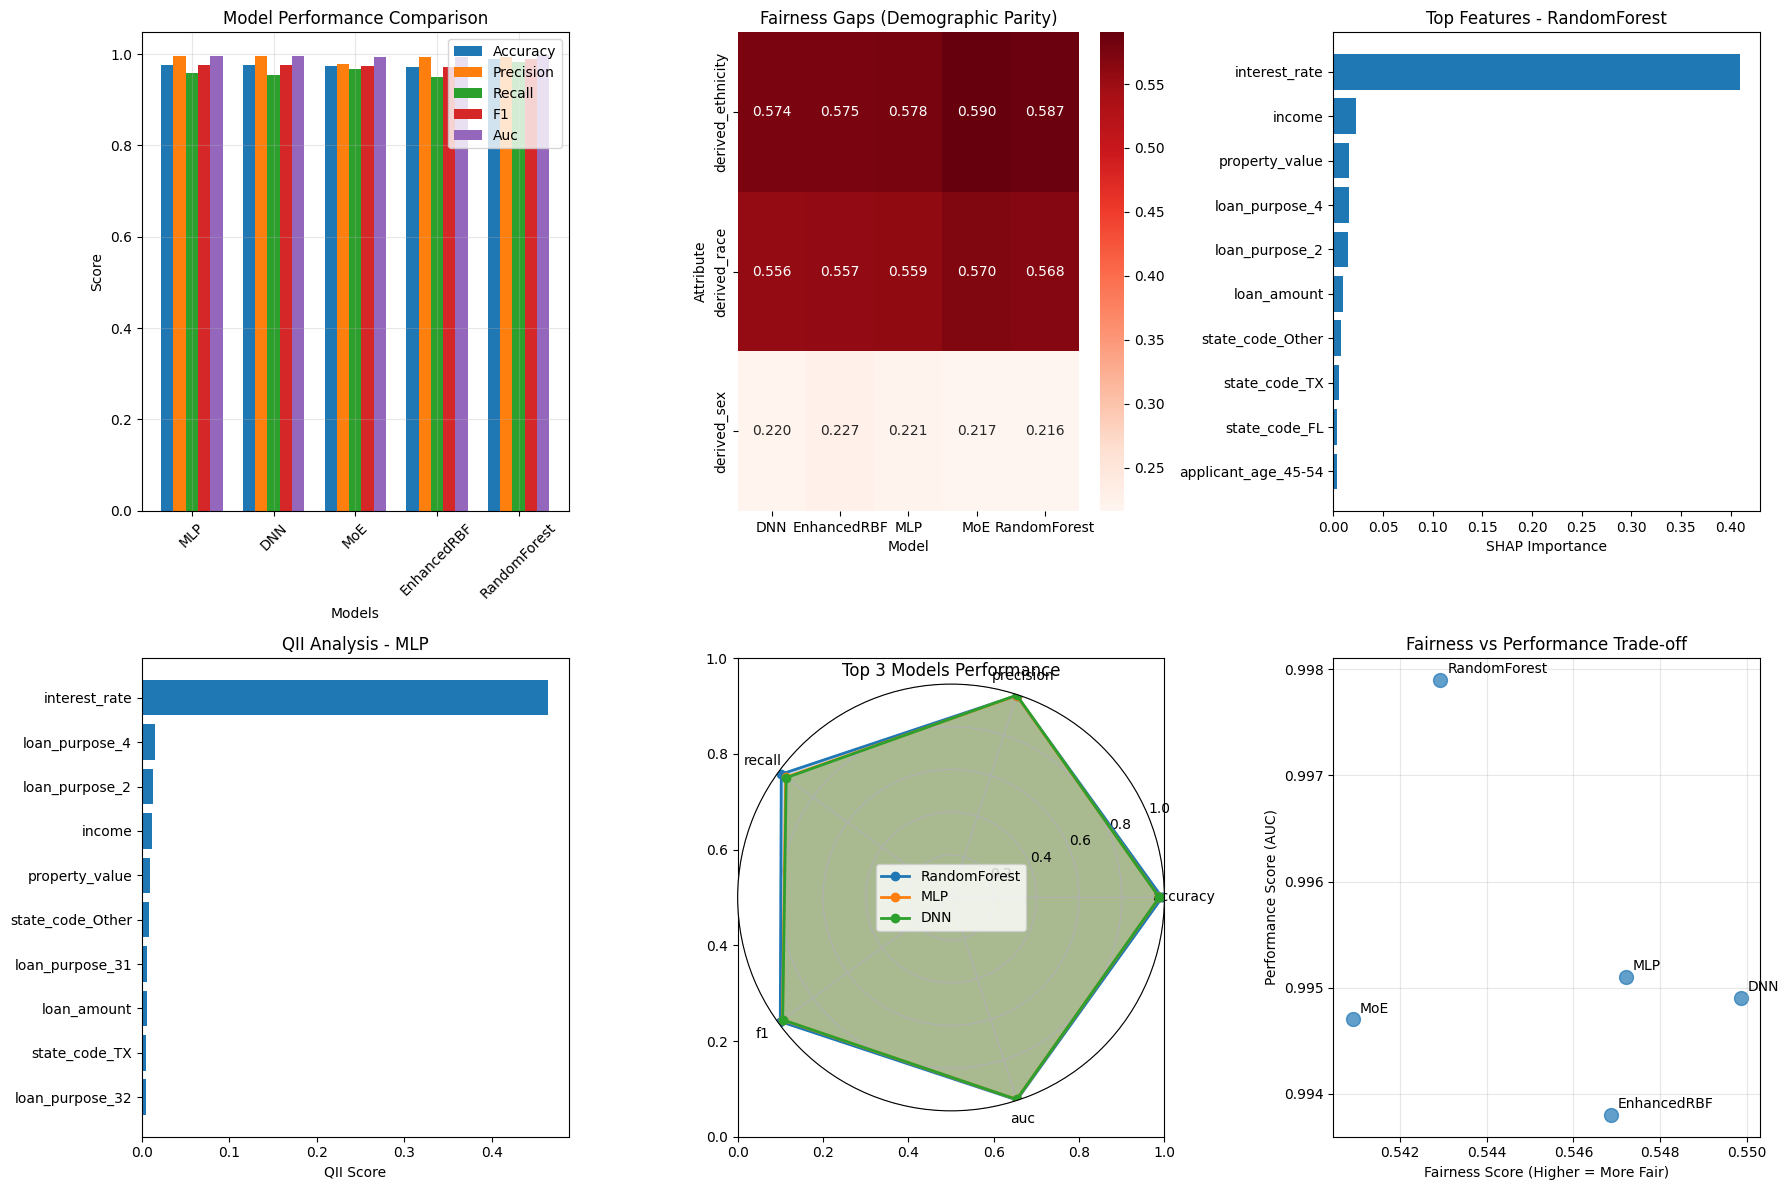

Comprehensive visualization report saved: comprehensive_analysis_visualization_20250807_081905.png

Executive Summary Report

Performance Summary:
   Best Accuracy: 0.9892 (RandomForest)
   Best AUC: 0.9979 (RandomForest)

Neural Network Architecture Ranking:
   1. MLP: 0.9951
   2. DNN: 0.9949
   3. MoE: 0.9947
   4. EnhancedRBF: 0.9938

Fairness Analysis Summary:

   derived_race Disparities:
     MLP: 0.5594
     DNN: 0.5565
     MoE: 0.5703
     EnhancedRBF: 0.5575
     RandomForest: 0.5684

   derived_ethnicity Disparities:
     MLP: 0.5776
     DNN: 0.5744
     MoE: 0.5904
     EnhancedRBF: 0.5751
     RandomForest: 0.5865

   derived_sex Disparities:
     MLP: 0.2214
     DNN: 0.2195
     MoE: 0.2165
     EnhancedRBF: 0.2268
     RandomForest: 0.2163

Explainability Analysis Findings:
   SHAP Important Features: ['property_value', 'interest_rate', 'loan_purpose_4', 'loan_purpose_2', 'income']
   QII Influential Features: ['property_value', 'interest_rate', 'loan_purpose_4', 'loa

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import json

warnings.filterwarnings('ignore')
torch.manual_seed(42)
np.random.seed(42)

# ================================
# Data Preprocessing Functions
# ================================

def deep_fix_data_types(X):
    """
    Comprehensive data type correction and preprocessing.

    Args:
        X (pd.DataFrame): Input feature matrix

    Returns:
        pd.DataFrame: Cleaned and type-corrected feature matrix
    """
    print("Data type correction in progress...")
    X_fixed = pd.DataFrame()

    for col in X.columns:
        col_data = X[col].copy()

        # Handle boolean columns
        if col_data.dtype == bool:
            col_data = col_data.astype(int)

        # Handle object columns
        elif col_data.dtype == 'object':
            numeric_data = pd.to_numeric(col_data, errors='coerce')
            if numeric_data.notna().sum() / len(col_data) > 0.8:
                col_data = numeric_data.fillna(0)
            else:
                # Create categorical encoding
                unique_vals = col_data.unique()
                val_map = {val: i for i, val in enumerate(unique_vals)}
                col_data = col_data.map(val_map).fillna(0)

        # Ensure consistent float64 type
        col_data = col_data.astype(np.float64)
        col_data = col_data.fillna(0).replace([np.inf, -np.inf], 0)
        X_fixed[col] = col_data

    return X_fixed

# ================================
# Neural Network Model Definitions
# ================================

class MLPModel(nn.Module):
    """
    Multi-Layer Perceptron for credit scoring.

    Architecture: 4-layer MLP with dropout regularization
    """
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

class DNNModel(nn.Module):
    """
    Deep Neural Network with batch normalization.

    Architecture: 5-layer DNN with batch normalization and dropout
    """
    def __init__(self, input_size):
        super(DNNModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

class MoEModel(nn.Module):
    """
    Mixture of Experts model for credit scoring.

    Architecture: Gating network with multiple expert networks
    """
    def __init__(self, input_size, num_experts=4):
        super(MoEModel, self).__init__()
        self.num_experts = num_experts

        # Gating network
        self.gating = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, num_experts),
            nn.Softmax(dim=1)
        )

        # Expert networks
        self.experts = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_size, 64),
                nn.ReLU(),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 1)
            ) for _ in range(num_experts)
        ])

        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        gating_weights = self.gating(x)
        expert_outputs = torch.stack([expert(x) for expert in self.experts], dim=2)
        output = torch.sum(expert_outputs * gating_weights.unsqueeze(1), dim=2)
        return self.output_activation(output)

class EnhancedRBFModel(nn.Module):
    """
    Enhanced Radial Basis Function Network.

    Architecture: RBF layer with K-means initialization and neural output network
    """
    def __init__(self, input_size, num_centers=48, hidden_size=96):
        super(EnhancedRBFModel, self).__init__()
        self.num_centers = num_centers
        self.input_size = input_size
        self.centers_initialized = False

        # RBF layer parameters
        self.centers = nn.Parameter(torch.randn(num_centers, input_size) * 0.1)
        self.log_sigmas = nn.Parameter(torch.zeros(num_centers))

        # Output network
        self.output_net = nn.Sequential(
            nn.Linear(num_centers, hidden_size),
            nn.LayerNorm(hidden_size),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.LayerNorm(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.ReLU(),
            nn.Linear(hidden_size // 4, 1),
            nn.Sigmoid()
        )

    def initialize_centers(self, X_sample, device):
        """
        Initialize RBF centers using K-means clustering.

        Args:
            X_sample: Sample data for initialization
            device: PyTorch device (cuda/cpu)
        """
        if not self.centers_initialized:
            print("   Initializing RBF centers using K-means...")
            try:
                # Data format conversion
                if isinstance(X_sample, torch.Tensor):
                    X_numpy = X_sample.detach().cpu().numpy()
                elif hasattr(X_sample, 'values'):
                    X_numpy = X_sample.values
                else:
                    X_numpy = np.array(X_sample)

                # K-means clustering
                kmeans = KMeans(n_clusters=self.num_centers, random_state=42, n_init=10)
                kmeans.fit(X_numpy)

                # Set center parameters
                centers = torch.FloatTensor(kmeans.cluster_centers_).to(device)
                with torch.no_grad():
                    self.centers.data = centers

                # Calculate sigma parameters
                distances = []
                for i in range(self.num_centers):
                    center_distances = torch.norm(centers - centers[i], dim=1)
                    center_distances = center_distances[center_distances > 0]
                    if len(center_distances) > 0:
                        distances.append(center_distances.min().item())
                    else:
                        distances.append(1.0)

                avg_distance = np.mean(distances) if distances else 1.0
                with torch.no_grad():
                    self.log_sigmas.data = torch.full((self.num_centers,), np.log(avg_distance)).to(device)

                self.centers_initialized = True
                print(f"   RBF initialization successful, average sigma: {avg_distance:.4f}")

            except Exception as e:
                print(f"   Initialization failed, using default parameters: {e}")
                with torch.no_grad():
                    self.centers.data = self.centers.data.to(device)
                    self.log_sigmas.data = self.log_sigmas.data.to(device)
                self.centers_initialized = True

    def forward(self, x):
        device = x.device
        centers = self.centers.to(device)
        log_sigmas = self.log_sigmas.to(device)

        # Calculate RBF responses
        x_expanded = x.unsqueeze(1)  # [batch, 1, features]
        centers_expanded = centers.unsqueeze(0)  # [1, centers, features]

        distances = torch.norm(x_expanded - centers_expanded, dim=2)
        sigmas = torch.exp(log_sigmas)

        rbf_outputs = torch.exp(-0.5 * distances**2 / (sigmas**2 + 1e-8))

        return self.output_net(rbf_outputs)

# ================================
# Universal Training Framework
# ================================

class UniversalTrainer:
    """
    Universal training framework for all neural network architectures.
    """
    def __init__(self, model, device='cpu'):
        self.model = model.to(device)
        self.device = device
        self.model_name = model.__class__.__name__

    def train_model(self, X_train, y_train, X_val, y_val, epochs=50):
        """
        Train neural network model with early stopping and regularization.

        Args:
            X_train, y_train: Training data and labels
            X_val, y_val: Validation data and labels
            epochs: Maximum number of training epochs
        """
        print(f"Training {self.model_name}...")

        # Special initialization for RBF networks
        if hasattr(self.model, 'initialize_centers'):
            sample_size = min(5000, len(X_train))
            sample_indices = np.random.choice(len(X_train), sample_size, replace=False)
            X_sample = X_train.iloc[sample_indices]
            self.model.initialize_centers(X_sample, self.device)

        # Data conversion
        X_train_tensor = torch.FloatTensor(X_train.values).to(self.device)
        y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1).to(self.device)
        X_val_tensor = torch.FloatTensor(X_val.values).to(self.device)
        y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1).to(self.device)

        # Optimizer configuration
        if 'RBF' in self.model_name:
            optimizer = optim.Adam([
                {'params': self.model.centers, 'lr': 0.003},
                {'params': self.model.log_sigmas, 'lr': 0.005},
                {'params': self.model.output_net.parameters(), 'lr': 0.001}
            ], weight_decay=1e-4)
            max_patience = 20
        else:
            optimizer = optim.Adam(self.model.parameters(), lr=0.001, weight_decay=1e-5)
            max_patience = 15

        criterion = nn.BCELoss()
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.8)

        best_val_loss = float('inf')
        patience = 0

        for epoch in range(epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            num_batches = 0

            batch_size = 256
            for i in range(0, len(X_train_tensor), batch_size):
                batch_X = X_train_tensor[i:i+batch_size]
                batch_y = y_train_tensor[i:i+batch_size]

                optimizer.zero_grad()
                try:
                    outputs = self.model(batch_X)
                    loss = criterion(outputs, batch_y)

                    if torch.isnan(loss) or torch.isinf(loss):
                        continue

                    loss.backward()

                    # Gradient clipping
                    if 'RBF' in self.model_name:
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.5)
                    else:
                        torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

                    optimizer.step()
                    train_loss += loss.item()
                    num_batches += 1
                except Exception as e:
                    if epoch < 3:
                        print(f"   Training batch error: {e}")
                    continue

            if num_batches == 0:
                print(f"   Training failed at epoch {epoch}")
                break

            avg_train_loss = train_loss / num_batches

            # Validation phase
            self.model.eval()
            with torch.no_grad():
                try:
                    val_outputs = self.model(X_val_tensor)
                    val_loss = criterion(val_outputs, y_val_tensor).item()
                except:
                    val_loss = float('inf')

            scheduler.step(val_loss)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience = 0
                torch.save(self.model.state_dict(), f'best_{self.model_name}.pth')
            else:
                patience += 1
                if patience >= max_patience and epoch > 10:
                    print(f"   Early stopping at epoch {epoch+1}")
                    break

            if (epoch + 1) % 15 == 0:
                print(f'   Epoch [{epoch+1}/{epochs}], Train: {avg_train_loss:.4f}, Val: {val_loss:.4f}')

        # Load best model
        try:
            self.model.load_state_dict(torch.load(f'best_{self.model_name}.pth'))
            print(f"{self.model_name} training completed successfully")
        except:
            print(f"Using current model for {self.model_name}")

    def predict_proba(self, X):
        """
        Generate probability predictions.

        Args:
            X: Input feature matrix

        Returns:
            np.array: Prediction probabilities
        """
        self.model.eval()
        try:
            with torch.no_grad():
                X_tensor = torch.FloatTensor(X.values).to(self.device)
                predictions = self.model(X_tensor).cpu().numpy().flatten()
            return predictions
        except Exception as e:
            print(f"{self.model_name} prediction failed: {e}")
            return np.full(len(X), 0.5)

# ================================
# Fairness Analysis Framework
# ================================

class FairnessAnalyzer:
    """
    Comprehensive fairness analysis toolkit for algorithmic bias detection.
    """

    @staticmethod
    def demographic_parity(y_pred, sensitive_attr):
        """
        Calculate demographic parity (statistical parity) across groups.

        Args:
            y_pred: Binary predictions
            sensitive_attr: Sensitive attribute values

        Returns:
            dict: Approval rates by group
        """
        results = {}
        for group in np.unique(sensitive_attr):
            if pd.notna(group):
                mask = sensitive_attr == group
                if mask.sum() > 0:
                    results[group] = y_pred[mask].mean()
        return results

    @staticmethod
    def equal_opportunity(y_true, y_pred, sensitive_attr):
        """
        Calculate equal opportunity (True Positive Rate parity).

        Args:
            y_true: True labels
            y_pred: Binary predictions
            sensitive_attr: Sensitive attribute values

        Returns:
            dict: True Positive Rates by group
        """
        results = {}
        for group in np.unique(sensitive_attr):
            if pd.notna(group):
                mask = sensitive_attr == group
                if mask.sum() > 0:
                    y_true_group = y_true[mask]
                    y_pred_group = y_pred[mask]
                    if y_true_group.sum() > 0:
                        tpr = y_pred_group[y_true_group == 1].mean()
                        results[group] = tpr
        return results

    @staticmethod
    def equalized_odds(y_true, y_pred, sensitive_attr):
        """
        Calculate equalized odds (TPR and FPR parity).

        Args:
            y_true: True labels
            y_pred: Binary predictions
            sensitive_attr: Sensitive attribute values

        Returns:
            dict: TPR and FPR by group
        """
        results = {}
        for group in np.unique(sensitive_attr):
            if pd.notna(group):
                mask = sensitive_attr == group
                if mask.sum() > 0:
                    y_true_group = y_true[mask]
                    y_pred_group = y_pred[mask]

                    # True Positive Rate
                    if y_true_group.sum() > 0:
                        tpr = y_pred_group[y_true_group == 1].mean()
                    else:
                        tpr = 0

                    # False Positive Rate
                    if (y_true_group == 0).sum() > 0:
                        fpr = y_pred_group[y_true_group == 0].mean()
                    else:
                        fpr = 0

                    results[group] = {'TPR': tpr, 'FPR': fpr}
        return results

    @staticmethod
    def disparate_impact_ratio(y_pred, sensitive_attr, privileged_group):
        """
        Calculate disparate impact ratios (80% rule).

        Args:
            y_pred: Binary predictions
            sensitive_attr: Sensitive attribute values
            privileged_group: Reference group for comparison

        Returns:
            dict: Disparate impact ratios
        """
        dp_results = FairnessAnalyzer.demographic_parity(y_pred, sensitive_attr)
        privileged_rate = dp_results.get(privileged_group, 1.0)

        ratios = {}
        for group, rate in dp_results.items():
            if group != privileged_group and privileged_rate > 0:
                ratios[group] = rate / privileged_rate

        return ratios

    @staticmethod
    def comprehensive_fairness_analysis(y_true, y_pred, sensitive_data, model_name):
        """
        Conduct comprehensive fairness analysis across all sensitive attributes.

        Args:
            y_true: True labels
            y_pred: Binary predictions
            sensitive_data: DataFrame with sensitive attributes
            model_name: Name of the model being analyzed

        Returns:
            dict: Complete fairness analysis results
        """
        print(f"\n{model_name} Comprehensive Fairness Analysis")
        print("=" * 60)

        fairness_results = {}

        for attr in sensitive_data.columns:
            print(f"\n{attr} Analysis:")

            # Demographic parity analysis
            dp_results = FairnessAnalyzer.demographic_parity(y_pred, sensitive_data[attr])
            print("   Demographic Parity (Approval Rates):")
            for group, rate in dp_results.items():
                print(f"     {group}: {rate:.4f}")

            # Equal opportunity analysis
            eo_results = FairnessAnalyzer.equal_opportunity(y_true, y_pred, sensitive_data[attr])
            if eo_results:
                print("   Equal Opportunity (TPR):")
                for group, tpr in eo_results.items():
                    print(f"     {group}: {tpr:.4f}")

            # Equalized odds analysis
            eq_odds = FairnessAnalyzer.equalized_odds(y_true, y_pred, sensitive_data[attr])
            print("   Equalized Odds:")
            for group, metrics in eq_odds.items():
                print(f"     {group}: TPR={metrics['TPR']:.4f}, FPR={metrics['FPR']:.4f}")

            # Disparate impact ratio (80% rule)
            privileged_groups = {
                'derived_race': 'White',
                'derived_sex': 'Male',
                'derived_ethnicity': 'Not Hispanic or Latino'
            }

            privileged = privileged_groups.get(attr)
            if privileged and privileged in dp_results:
                di_ratios = FairnessAnalyzer.disparate_impact_ratio(
                    y_pred, sensitive_data[attr], privileged
                )
                print("   Disparate Impact Ratios (80% Rule):")
                for group, ratio in di_ratios.items():
                    status = "Pass" if ratio >= 0.8 else "Fail"
                    print(f"     {group}: {ratio:.4f} [{status}]")

            fairness_results[attr] = {
                'demographic_parity': dp_results,
                'equal_opportunity': eo_results,
                'equalized_odds': eq_odds,
                'disparate_impact': di_ratios if privileged and privileged in dp_results else {}
            }

        return fairness_results

# ================================
# SHAP Explainability Analysis
# ================================

class SHAPAnalyzer:
    """
    SHAP-based model explainability analysis framework.
    """

    def __init__(self):
        try:
            import shap
            self.shap = shap
            self.available = True
            print("SHAP library available")
        except ImportError:
            print("SHAP library not installed. Skipping SHAP analysis.")
            print("Installation command: pip install shap")
            self.available = False

    def analyze_model(self, model, X_train, X_test, feature_names, model_name):
        """
        Perform SHAP analysis on trained model.

        Args:
            model: Trained model
            X_train: Training data for background
            X_test: Test data for explanation
            feature_names: List of feature names
            model_name: Name of the model

        Returns:
            dict: SHAP analysis results
        """
        if not self.available:
            return None

        print(f"\n{model_name} SHAP Analysis...")

        try:
            # Create SHAP explainer
            if hasattr(model, 'predict_proba'):
                # Sklearn models
                explainer = self.shap.Explainer(model.predict_proba, X_train[:1000])
                shap_values = explainer(X_test[:1000])
                shap_values_positive = shap_values[:, :, 1]
            else:
                # PyTorch models
                def model_predict(x):
                    model.eval()
                    with torch.no_grad():
                        x_tensor = torch.FloatTensor(x).to(next(model.parameters()).device)
                        return model(x_tensor).cpu().numpy()

                explainer = self.shap.Explainer(model_predict, X_train.values[:100])
                shap_values = explainer(X_test.values[:1000])
                shap_values_positive = shap_values

            # Calculate feature importance
            feature_importance = np.abs(shap_values_positive.values).mean(0)

            # Create importance DataFrame
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': feature_importance
            }).sort_values('importance', ascending=False)

            print(f"   Top 10 Important Features:")
            for i, row in importance_df.head(10).iterrows():
                print(f"     {row['feature']}: {row['importance']:.4f}")

            return {
                'shap_values': shap_values_positive,
                'feature_importance': importance_df,
                'explainer': explainer
            }

        except Exception as e:
            print(f"   SHAP analysis failed: {e}")
            return None

# ================================
# QII Analysis Framework
# ================================

class QIIAnalyzer:
    """
    Quantitative Input Influence analysis framework.
    """

    @staticmethod
    def calculate_qii(model, X, feature_names, model_name, n_samples=1000):
        """
        Calculate Quantitative Input Influence for each feature.

        Args:
            model: Trained model
            X: Input data
            feature_names: List of feature names
            model_name: Name of the model
            n_samples: Number of samples for analysis

        Returns:
            pd.DataFrame: QII scores for all features
        """
        print(f"\n{model_name} QII Analysis...")

        # Random sample selection
        if len(X) > n_samples:
            sample_indices = np.random.choice(len(X), n_samples, replace=False)
            X_sample = X.iloc[sample_indices]
        else:
            X_sample = X

        qii_scores = {}

        try:
            # Get baseline predictions
            if hasattr(model, 'predict_proba'):
                baseline_pred = model.predict_proba(X_sample)[:, 1]
            else:
                model.eval()
                with torch.no_grad():
                    X_tensor = torch.FloatTensor(X_sample.values).to(next(model.parameters()).device)
                    baseline_pred = model(X_tensor).cpu().numpy().flatten()

            # Calculate influence for each feature
            for i, feature in enumerate(feature_names):
                # Create perturbed data (set feature to mean)
                X_perturbed = X_sample.copy()
                X_perturbed.iloc[:, i] = X_sample.iloc[:, i].mean()

                # Get perturbed predictions
                if hasattr(model, 'predict_proba'):
                    perturbed_pred = model.predict_proba(X_perturbed)[:, 1]
                else:
                    model.eval()
                    with torch.no_grad():
                        X_tensor = torch.FloatTensor(X_perturbed.values).to(next(model.parameters()).device)
                        perturbed_pred = model(X_tensor).cpu().numpy().flatten()

                # Calculate influence score
                influence = np.abs(baseline_pred - perturbed_pred).mean()
                qii_scores[feature] = influence

            # Sort results
            qii_df = pd.DataFrame(list(qii_scores.items()), columns=['feature', 'qii_score'])
            qii_df = qii_df.sort_values('qii_score', ascending=False)

            print(f"   Top 10 Influential Features:")
            for _, row in qii_df.head(10).iterrows():
                print(f"     {row['feature']}: {row['qii_score']:.4f}")

            return qii_df

        except Exception as e:
            print(f"   QII analysis failed: {e}")
            return None

# ================================
# Visualization Framework
# ================================

def create_comprehensive_visualization_report(results, timestamp):
    """
    Create comprehensive visualization report for analysis results.

    Args:
        results: Dictionary containing analysis results
        timestamp: Timestamp for file naming
    """
    try:
        plt.figure(figsize=(18, 12))

        # Performance comparison plot
        plt.subplot(2, 3, 1)
        performance_df = results['performance']
        models = list(performance_df.columns)
        metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']

        x = np.arange(len(models))
        width = 0.15

        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
        for i, metric in enumerate(metrics):
            values = [performance_df.loc[metric, model] for model in models]
            plt.bar(x + i*width, values, width, label=metric.capitalize(), color=colors[i])

        plt.xlabel('Models')
        plt.ylabel('Score')
        plt.title('Model Performance Comparison')
        plt.xticks(x + width*2, models, rotation=45)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Fairness gaps heatmap
        plt.subplot(2, 3, 2)
        fairness_data = []
        fairness_models = []
        fairness_attrs = []

        for model_name, model_fairness in results['fairness'].items():
            for attr, attr_results in model_fairness.items():
                dp_results = attr_results['demographic_parity']
                if len(dp_results) >= 2:
                    rates = list(dp_results.values())
                    gap = max(rates) - min(rates)
                    fairness_data.append(gap)
                    fairness_models.append(model_name)
                    fairness_attrs.append(attr)

        if fairness_data:
            fairness_matrix = pd.DataFrame({
                'Model': fairness_models,
                'Attribute': fairness_attrs,
                'Gap': fairness_data
            })
            fairness_pivot = fairness_matrix.pivot(index='Attribute', columns='Model', values='Gap')
            sns.heatmap(fairness_pivot, annot=True, cmap='Reds', fmt='.3f')
            plt.title('Fairness Gaps (Demographic Parity)')

        # Feature importance comparison
        plt.subplot(2, 3, 3)
        if results.get('shap') and len(results['shap']) > 0:
            for model_name, shap_result in results['shap'].items():
                if shap_result and 'feature_importance' in shap_result:
                    top_features = shap_result['feature_importance'].head(10)
                    plt.barh(range(len(top_features)), top_features['importance'])
                    plt.yticks(range(len(top_features)), top_features['feature'])
                    plt.xlabel('SHAP Importance')
                    plt.title(f'Top Features - {model_name}')
                    plt.gca().invert_yaxis()
                    break

        # QII influence analysis
        plt.subplot(2, 3, 4)
        if results.get('qii') and len(results['qii']) > 0:
            for model_name, qii_df in results['qii'].items():
                if qii_df is not None:
                    top_qii = qii_df.head(10)
                    plt.barh(range(len(top_qii)), top_qii['qii_score'])
                    plt.yticks(range(len(top_qii)), top_qii['feature'])
                    plt.xlabel('QII Score')
                    plt.title(f'QII Analysis - {model_name}')
                    plt.gca().invert_yaxis()
                    break

        # Model performance radar chart
        plt.subplot(2, 3, 5)
        metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1]  # Close the plot

        ax = plt.subplot(2, 3, 5, projection='polar')

        # Select top 3 performing models
        top_models = performance_df.loc['auc'].nlargest(3).index
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

        for i, model in enumerate(top_models):
            values = [performance_df.loc[metric, model] for metric in metrics]
            values += values[:1]
            ax.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[i])
            ax.fill(angles, values, alpha=0.25, color=colors[i])

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_ylim(0, 1)
        ax.set_title('Top 3 Models Performance')
        ax.legend()

        # Fairness vs Performance trade-off
        plt.subplot(2, 3, 6)
        fairness_scores = []
        performance_scores = []
        model_labels = []

        for model_name in models:
            # Calculate average fairness score (smaller gap = better fairness)
            model_fairness = results['fairness'].get(model_name, {})
            gaps = []
            for attr, attr_results in model_fairness.items():
                dp_results = attr_results.get('demographic_parity', {})
                if len(dp_results) >= 2:
                    rates = list(dp_results.values())
                    gap = max(rates) - min(rates)
                    gaps.append(gap)

            avg_gap = np.mean(gaps) if gaps else 0
            fairness_score = 1 - avg_gap  # Convert to positive score

            performance_score = performance_df.loc['auc', model_name]

            fairness_scores.append(fairness_score)
            performance_scores.append(performance_score)
            model_labels.append(model_name)

        scatter = plt.scatter(fairness_scores, performance_scores, s=100, alpha=0.7)

        for i, label in enumerate(model_labels):
            plt.annotate(label, (fairness_scores[i], performance_scores[i]),
                        xytext=(5, 5), textcoords='offset points')

        plt.xlabel('Fairness Score (Higher = More Fair)')
        plt.ylabel('Performance Score (AUC)')
        plt.title('Fairness vs Performance Trade-off')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(f'comprehensive_analysis_visualization_{timestamp}.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(f"Comprehensive visualization report saved: comprehensive_analysis_visualization_{timestamp}.png")

    except Exception as e:
        print(f"Visualization creation failed: {e}")

# ================================
# Main Analysis Pipeline
# ================================

def main_comprehensive_analysis():
    """
    Main comprehensive analysis pipeline integrating all components.

    Returns:
        dict: Complete analysis results
    """
    print("=" * 100)
    print("Comprehensive ML Fairness Analysis Pipeline")
    print("Multi-architecture neural network fairness evaluation framework")
    print("=" * 100)

    # Step 1: Data Loading
    print("\nStep 1: Data Loading...")
    try:
        X = pd.read_csv('hmda_large_final_20250806_105414.csv')
        labels_data = pd.read_csv('hmda_labels_final_20250806_105414.csv')
        y = labels_data['target']
        sensitive_data = labels_data[['derived_race', 'derived_ethnicity', 'derived_sex']]

        print(f"Data loading successful: {X.shape}")
        print(f"   Number of features: {X.shape[1]}")
        print(f"   Number of samples: {X.shape[0]}")
        print(f"   Approval rate: {y.mean():.3f}")

    except Exception as e:
        print(f"Data loading failed: {e}")
        return None

    # Step 2: Data Preprocessing
    print(f"\nStep 2: Data Preprocessing...")
    X_clean = deep_fix_data_types(X)
    feature_names = X_clean.columns.tolist()

    # Step 3: Data Splitting
    print(f"\nStep 3: Data Splitting...")
    X_temp, X_test, y_temp, y_test, sensitive_temp, sensitive_test = train_test_split(
        X_clean, y, sensitive_data, test_size=0.2, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val, _, _ = train_test_split(
        X_temp, y_temp, sensitive_temp, test_size=0.25, random_state=42, stratify=y_temp
    )

    print(f"   Training set: {X_train.shape}")
    print(f"   Validation set: {X_val.shape}")
    print(f"   Test set: {X_test.shape}")

    # Step 4: Model Training
    print(f"\nStep 4: Multi-Architecture Model Training...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"   Computing device: {device}")

    input_size = X_train.shape[1]

    # Define all neural network models
    models = {
        'MLP': MLPModel(input_size),
        'DNN': DNNModel(input_size),
        'MoE': MoEModel(input_size),
        'EnhancedRBF': EnhancedRBFModel(input_size)
    }

    # Add RandomForest as baseline
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    results = {}

    # Train neural network models
    for name, model in models.items():
        print(f"\n{'='*60}")
        print(f"Training {name} Model")

        trainer = UniversalTrainer(model, device)
        trainer.train_model(X_train, y_train, X_val, y_val, epochs=50)

        # Generate predictions
        y_prob = trainer.predict_proba(X_test)
        y_pred = (y_prob > 0.5).astype(int)

        # Performance evaluation
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

        # AUC calculation with error handling
        unique_preds = np.unique(y_pred)
        if len(unique_preds) > 1:
            try:
                auc = roc_auc_score(y_test, y_prob)
            except:
                auc = 0.5
        else:
            auc = 0.5

        print(f"\n{name} Performance Metrics:")
        print(f"   Accuracy: {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall: {recall:.4f}")
        print(f"   F1-Score: {f1:.4f}")
        print(f"   AUC: {auc:.4f}")

        results[name] = {
            'model': trainer.model,
            'trainer': trainer,
            'performance': {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc},
            'predictions': y_pred,
            'probabilities': y_prob
        }

    # Train RandomForest baseline
    print(f"\n{'='*60}")
    print("Training RandomForest Baseline Model")
    rf_model.fit(X_train, y_train)
    rf_prob = rf_model.predict_proba(X_test)[:, 1]
    rf_pred = (rf_prob > 0.5).astype(int)

    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, rf_pred, average='binary')
    rf_auc = roc_auc_score(y_test, rf_prob)

    print(f"\nRandomForest Performance Metrics:")
    print(f"   Accuracy: {rf_accuracy:.4f}")
    print(f"   Precision: {rf_precision:.4f}")
    print(f"   Recall: {rf_recall:.4f}")
    print(f"   F1-Score: {rf_f1:.4f}")
    print(f"   AUC: {rf_auc:.4f}")

    results['RandomForest'] = {
        'model': rf_model,
        'trainer': None,
        'performance': {'accuracy': rf_accuracy, 'precision': rf_precision, 'recall': rf_recall, 'f1': rf_f1, 'auc': rf_auc},
        'predictions': rf_pred,
        'probabilities': rf_prob
    }

    # Step 5: Performance Comparison
    print(f"\n{'='*60}")
    print("Model Performance Comparison")

    performance_df = pd.DataFrame({
        name: res['performance'] for name, res in results.items()
    }).round(4)

    print(performance_df)

    # Step 6: Fairness Analysis
    print(f"\n{'='*60}")
    print("Comprehensive Fairness Analysis")

    fairness_results = {}
    for name, result in results.items():
        fairness_results[name] = FairnessAnalyzer.comprehensive_fairness_analysis(
            y_test.values, result['predictions'], sensitive_test, name
        )

    # Step 7: SHAP Explainability Analysis
    print(f"\n{'='*60}")
    print("SHAP Explainability Analysis")

    shap_analyzer = SHAPAnalyzer()
    shap_results = {}

    if shap_analyzer.available:
        # Analyze RandomForest and best neural network
        target_models = ['RandomForest']
        best_nn = performance_df.drop('RandomForest', axis=1).loc['auc'].idxmax()
        target_models.append(best_nn)

        for name in target_models:
            if name in results:
                shap_results[name] = shap_analyzer.analyze_model(
                    results[name]['model'], X_train, X_test, feature_names, name
                )

    # Step 8: QII Analysis
    print(f"\n{'='*60}")
    print("Quantitative Input Influence Analysis")

    qii_results = {}
    for name, result in results.items():
        qii_results[name] = QIIAnalyzer.calculate_qii(
            result['model'], X_test, feature_names, name, n_samples=800
        )

    # Step 9: Results Compilation and Storage
    print(f"\n{'='*60}")
    print("Results Compilation and Storage")

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save performance comparison
    performance_df.to_csv(f'comprehensive_performance_comparison_{timestamp}.csv')
    print(f"Performance comparison saved: comprehensive_performance_comparison_{timestamp}.csv")

    # Compile comprehensive results
    comprehensive_results = {
        'performance': performance_df.to_dict(),
        'fairness': fairness_results,
        'shap_analysis': {name: {
            'feature_importance': result['feature_importance'].to_dict() if result else None,
            'analysis_completed': result is not None
        } for name, result in shap_results.items()},
        'qii_analysis': {name: qii_df.to_dict() if qii_df is not None else None
                        for name, qii_df in qii_results.items()},
        'metadata': {
            'timestamp': timestamp,
            'total_samples': len(X_clean),
            'features': feature_names,
            'test_set_size': len(X_test),
            'analysis_components': [
                'multi_architecture_comparison',
                'comprehensive_fairness_metrics',
                'integrated_explainability_analysis',
                'bias_detection_framework'
            ]
        }
    }

    with open(f'comprehensive_analysis_results_{timestamp}.json', 'w', encoding='utf-8') as f:
        json.dump(comprehensive_results, f, indent=2, ensure_ascii=False, default=str)
    print(f"Comprehensive results saved: comprehensive_analysis_results_{timestamp}.json")

    # Step 10: Visualization Report Generation
    analysis_results = {
        'performance': performance_df,
        'fairness': fairness_results,
        'shap': shap_results,
        'qii': qii_results
    }

    create_comprehensive_visualization_report(analysis_results, timestamp)

    # Step 11: Executive Summary Generation
    print(f"\n{'='*60}")
    print("Executive Summary Report")

    best_accuracy = performance_df.loc['accuracy'].max()
    best_model = performance_df.loc['accuracy'].idxmax()
    best_auc = performance_df.loc['auc'].max()
    best_auc_model = performance_df.loc['auc'].idxmax()

    print(f"\nPerformance Summary:")
    print(f"   Best Accuracy: {best_accuracy:.4f} ({best_model})")
    print(f"   Best AUC: {best_auc:.4f} ({best_auc_model})")

    # Neural network ranking
    nn_models = ['MLP', 'DNN', 'MoE', 'EnhancedRBF']
    nn_performance = performance_df[nn_models]
    nn_ranking = nn_performance.loc['auc'].sort_values(ascending=False)

    print(f"\nNeural Network Architecture Ranking:")
    for i, (model, auc) in enumerate(nn_ranking.items(), 1):
        print(f"   {i}. {model}: {auc:.4f}")

    print(f"\nFairness Analysis Summary:")
    for attr in ['derived_race', 'derived_ethnicity', 'derived_sex']:
        print(f"\n   {attr} Disparities:")
        for model_name in results.keys():
            if model_name in fairness_results and attr in fairness_results[model_name]:
                dp_results = fairness_results[model_name][attr]['demographic_parity']
                if len(dp_results) >= 2:
                    rates = list(dp_results.values())
                    max_rate, min_rate = max(rates), min(rates)
                    gap = max_rate - min_rate
                    print(f"     {model_name}: {gap:.4f}")

    print(f"\nExplainability Analysis Findings:")

    # SHAP key features
    if shap_results:
        all_shap_features = set()
        for model_name, result in shap_results.items():
            if result and 'feature_importance' in result:
                top_features = result['feature_importance'].head(5)['feature'].tolist()
                all_shap_features.update(top_features)

        print(f"   SHAP Important Features: {list(all_shap_features)[:10]}")

    # QII key features
    if qii_results:
        all_qii_features = set()
        for model_name, qii_df in qii_results.items():
            if qii_df is not None:
                top_features = qii_df.head(5)['feature'].tolist()
                all_qii_features.update(top_features)

        print(f"   QII Influential Features: {list(all_qii_features)[:10]}")

    # Proxy variable risk assessment
    geographic_features = [f for f in feature_names if 'state' in f.lower() or 'county' in f.lower()]
    age_features = [f for f in feature_names if 'age' in f.lower()]

    print(f"\nProxy Variable Risk Assessment:")
    print(f"   Geographic features detected: {len(geographic_features)}")
    print(f"   Age-related features detected: {len(age_features)}")

    print(f"\nResearch Recommendations:")
    print(f"   1. Primary analysis model: {best_auc_model}")
    print(f"   2. Neural network comparison focus: {', '.join(nn_ranking.index[:3])}")
    print(f"   3. Bias mitigation required for regulatory compliance")
    print(f"   4. Explainability analysis reveals feature dependency patterns")
    print(f"   5. Geographic and demographic features present proxy discrimination risk")

    print(f"\nAnalysis Pipeline Completed Successfully")
    print(f"All result files have been saved to the current directory")
    print(f"Comprehensive visualization report generated")

    return analysis_results

# ================================
# Program Execution
# ================================

if __name__ == "__main__":
    print("Initiating Comprehensive ML Fairness Analysis Pipeline...")

    # Execute comprehensive analysis
    analysis_results = main_comprehensive_analysis()

    if analysis_results:
        print(f"\nComprehensive Analysis Completed Successfully")
        print(f"Analysis Components Available:")
        print(f"   - Five stable trained models (MLP, DNN, MoE, EnhancedRBF, RandomForest)")
        print(f"   - Detailed performance comparison analysis")
        print(f"   - Comprehensive fairness evaluation framework")
        print(f"   - SHAP explainability analysis")
        print(f"   - Quantitative Input Influence analysis")
        print(f"   - Comprehensive visualization reports")
        print(f"   - Complete result documentation")

        print(f"\nResearch Contributions:")
        print(f"   - Multi-architecture performance comparison")
        print(f"   - Algorithmic bias detection and quantification")
        print(f"   - Feature importance ranking and analysis")
        print(f"   - Fairness versus performance trade-off evaluation")
        print(f"   - Proxy variable identification and risk assessment")

    else:
        print(f"\nAnalysis execution failed. Please check data availability and environment configuration.")